## 鐵達尼號生存預測練習

- 資料來源：https://www.kaggle.com/c/titanic

- Code參考來源：https://www.kaggle.com/code/startupsci/titanic-data-science-solutions 

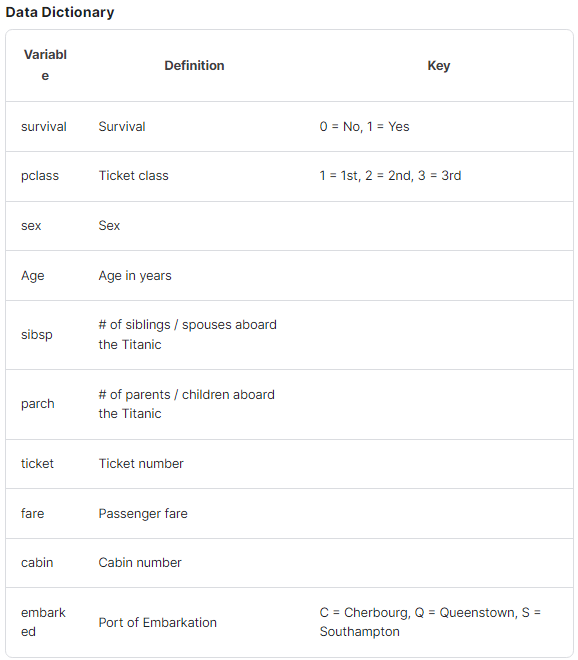


In [53]:
import os

import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

for dirname, _, filenames in os.walk('D:/OneDrive/桌面/kaggle/titanic/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/OneDrive/桌面/kaggle/titanic/gender_submission.csv
D:/OneDrive/桌面/kaggle/titanic/test.csv
D:/OneDrive/桌面/kaggle/titanic/titanic-study.ipynb
D:/OneDrive/桌面/kaggle/titanic/train.csv


In [6]:
#獲取資料
train = pd.read_csv('D:/OneDrive/桌面/kaggle/titanic/train.csv')
test = pd.read_csv('D:/OneDrive/桌面/kaggle/titanic/test.csv')
conbine = [train, test]

In [7]:
#檢視欄位
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
train.info()
print('_'*40,'\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

---
## **敘述統計**

### 訓練集數值型資料敘述統計：

- 總樣本891個，佔母體 40%
- 樣本存活率約為 38%
- 75% 以上的人並未與兒童或父母親同行
- 近 30% 的乘客與兄弟姊妹和/或配偶同行

In [11]:
#訓練資料集敘述統計
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **訓練集類別型資料敘述統計：**

- 男性有557名，佔總人數 577/891 = 64%左右

- 上船港口有3個，最多人在S點上船(644)人

- 船艙共147間，看起來最多4人共睡一間

- 票號到681號，其中347082號有7張

In [12]:
#類別行變數敘述統計
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644



---
- ### 數據相關性

    - 了解每個特徵與是否生存的關聯程度
 
 
 
- ### 數據補全、修正

    - Age有部分缺失，需進行填補

    - Ticket(票號) 可能與是否生存並無關連，故排除此變數
    
    - Cabin 缺失值過多， 故排除此變數
    
    - PassengerId, Name 也與是否生存無關，故排除此變數
 

 
- #### **建構新特徵**

    - 建構Age Group ，將年齡分群，使數值型特徵轉為類別型
    
    - 建構 family 變數，以計算 SbiSp 和 Parch 的總數
 
 

- #### 分類假設(根據kaggle 資料所述)

    - 女性更有可能存活
    
    - 兒童更有可能生存
    
    - 頭等艙的乘客夠有可能生存

 
---

### 驗驗不同特徵與生存率的關聯

特徵選擇：船艙等級 Pclass、性別Sex、兄弟姐妹配偶數 SibSp、父母孩子數 Parch

 - 性別： 女性生存率顯著高於男性，其存活率高達74%

 - 船艙等級：Pclass為1的乘客其存活率達到64%

 - SibSp 和 Parch：並沒有看到與是否生存的直接關連，可能要新建一個變數來測試

In [13]:
train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


---

## 透過資料視覺化進行分析

使用sns.FacetGrid創建一個圖形的網格，可以按照數據集中的一個或多個分類變量的不同值來分面顯示。
  
使用g.map將一個繪圖函數應用於每個分面。
  
### **1. 不同生存狀態（生存或未生存）下的年齡分佈情況**

  - 乘客年齡主要落在15~35歲

  - 16~25歲的乘客死亡率較高

  - 4歲以下的乘客存活率很高

  - 有80歲的乘客存活
  
根據上面結果，我們可以考慮將年齡放入模型中，並建構年齡分組的變數

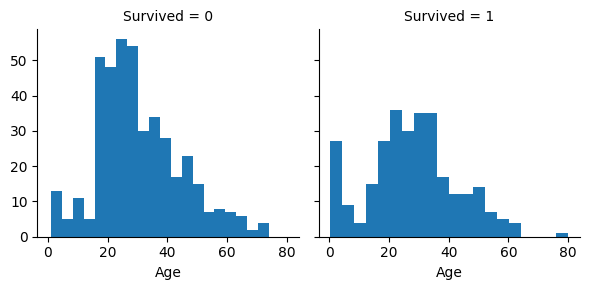

In [17]:
# Age vs Survived
g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

 ###  **2. 不同的生存狀態（生存或未生存）和不同的乘客等級（例如頭等艙、二等艙、三等艙）下，乘客年齡的分佈情況**

- 年輕的乘客主要居住在下層(Pclass = 3)，並且其存活率較低

- 住在最上層的乘客存活率都較剛

- 住在中間層且年齡低於10歲的乘客全存活

#### 根據上面的結果，同樣將船艙等級 Pclass 放入模型

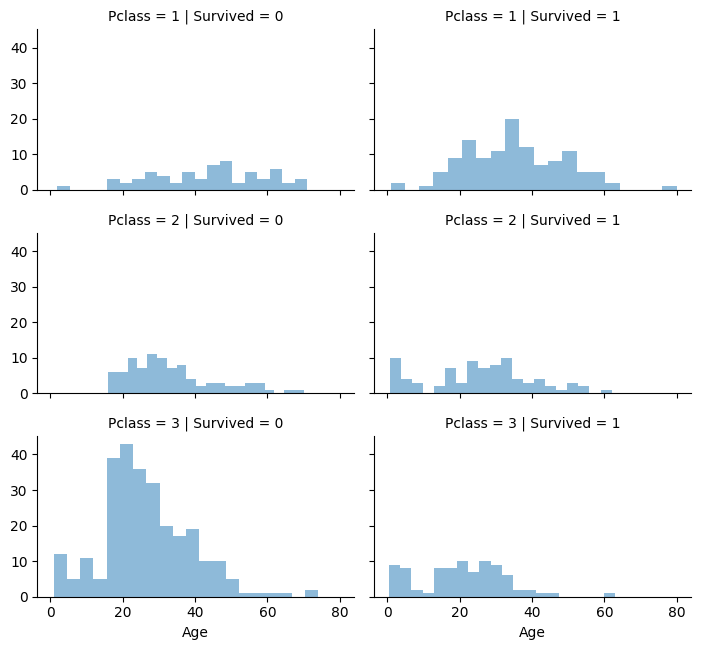

In [18]:
# Pclass vs Age vs Survived
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### **3. 根據登船港口分類，展示不同性別和船艙下的生存率**

- 不論從哪個港口上船，乘客的生存率接隨著船艙等級下降而下降
  
- 女性生存率普遍高於男性，但C港口的例外，男性反而有較高的生存率
  
- 登船港口對於Pclass = 3 三等艙乘客以及男性乘客的生存率有不同的影響 

根據上面的結果，我們可以考慮將性別以及登船港口加入到模型中

c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

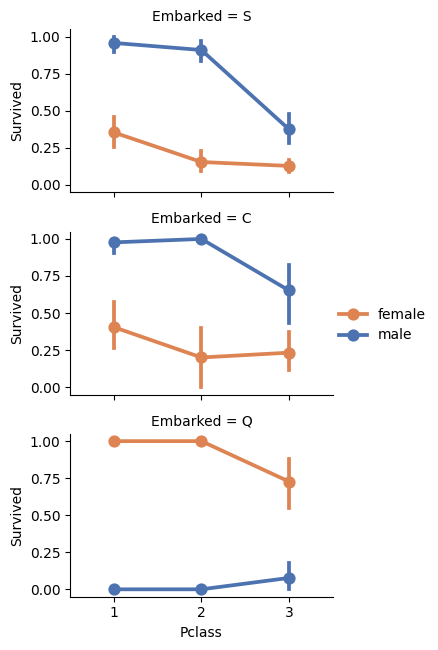

In [19]:
grid = sns.FacetGrid(train, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot,'Pclass','Survived', 'Sex', palette = 'deep') # x = plcass, y = Survived, color = Sex
grid.add_legend()

### **4. 根據登船港口與是否生存，檢視不同性別的票價**
- 對於不同的登船地點（S、C、Q），乘客支付的票價似乎有所不同。特別是從 C 登船的乘客，不論生存與否，支付的票價似乎普   遍高於其他兩個登船地點。
- 在大多數情況下，女性乘客支付的票價高於男性，尤其是在 C 登船地點和生存的乘客群體中。
- 在 C 登船地點，生還者支付的票價顯著高於未生還者，這可能表明票價較高的乘客享有較高的生存機會。S 和 Q 登船地點的數   據中，這種差異不是特別明顯。
#### 根據結果，我們可以考慮建構費用分組變數，並加入到模型中

c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\erjac\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:85

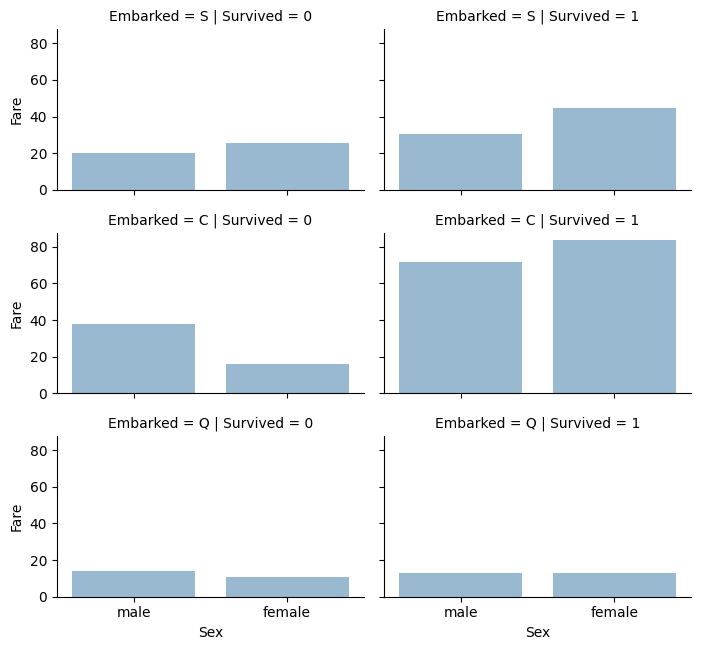

In [20]:
grid = sns.FacetGrid(train, row = 'Embarked', col = 'Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = .5, ci = None)
grid.add_legend()

## 數據處理

### 1. 刪除不必要特徵：
   - Ticket(票號) 可能與是否生存並無關連，故排除此變數

   - Cabin 缺失值過多， 故排除此變數

   - PassengerId 也與是否生存無關，故排除此變數

In [21]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
test = test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
combine = [train, test]

## 2. 新增特徵

#### 根據上面的分析，有以下幾個需要建構的特徵
- Age band

- fare band

- famliy

除此之外，還需把性別特徵從object改為int

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


在處理年齡分組變數前，有一些缺失值必須填補，填補方法是根據乘客所在的船艙與性別，以相同類群乘客的年齡中位數來填補

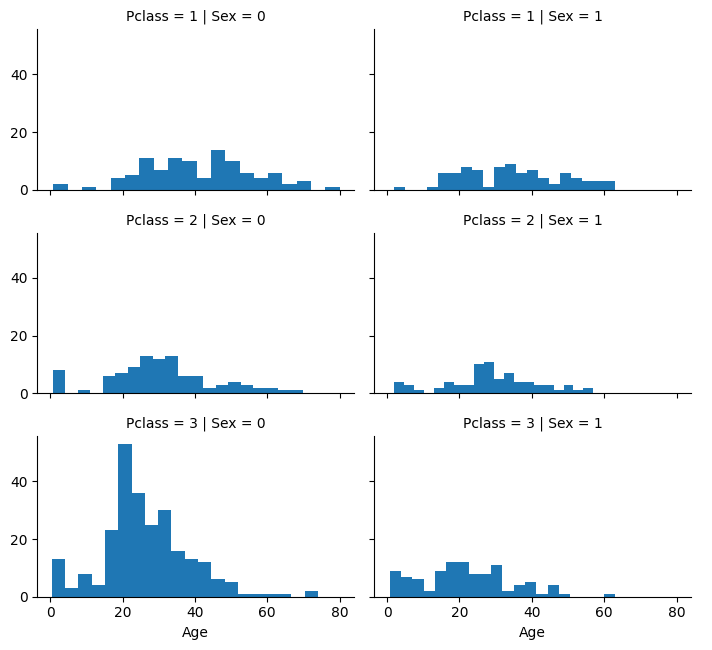

In [24]:
grid = sns.FacetGrid(train, row = 'Pclass', col = 'Sex', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend()

In [25]:
for dataset in combine:
    for i in range(0,2):
        for j in range(1,4):
            guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j)]['Age'].dropna()
            
            age_median = guess.median()
            
            guess = int(age_median/0.5 + 0.5) * 0.5
            
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j), 'Age'] = guess

    dataset['Age'] = dataset['Age'].astype(int)
            
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.9+ KB


### 建構年齡分組變數

In [26]:
train['Age_band'] = pd.cut(train['Age'], 5)
train[['Age_band','Survived']].groupby(['Age_band'], as_index = False) \
                              .mean().sort_values(by= 'Age_band', ascending = True)

C:\Users\erjac\AppData\Local\Temp\ipykernel_30612\40103931.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['Age_band','Survived']].groupby(['Age_band'], as_index = False) \


,Age_band,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


### 將 Age 更換為年齡分組變數

In [27]:
for dataset in combine: 
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age']<= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band
0,0,3,0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,"(32.0, 48.0]"


In [28]:
train = train.drop(['Age_band'], axis = 1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


### 建構 Family 變數

In [29]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1 

train[['Family','Survived']].groupby(['Family']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Family,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


將 Family 改為是否單獨搭乘 is_Alone

In [30]:
for dataset in combine:
    dataset['isAlone'] = 0
    dataset.loc[dataset['Family'] > 1, 'isAlone'] = 1

train[['isAlone','Survived']].groupby(['isAlone'], as_index = False).mean()

,isAlone,Survived
0,0,0.303538
1,1,0.505650


In [31]:
train = train.drop(['Parch','SibSp','Family'], axis = 1)
test = test.drop(['Parch','SibSp','Family'], axis = 1)

combine = [train, test]

### 建構交乘項(Age x Pclass)

In [32]:
for dataset in combine :
    dataset['Age_Pclass'] = dataset['Age'] * dataset['Pclass']
    
train[['Age_Pclass','Age','Pclass']].head(10)

,Age_Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### 填補Embark缺失值：使用眾數填補

In [33]:
freq_port = train['Embarked'].dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:

    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train[['Embarked','Survived']].groupby(['Embarked'],as_index = False).mean().sort_values(by= 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
for dataset in combine:
    
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone,Age_Pclass
0,0,3,0,1,7.2500,0,1,3
1,1,1,1,2,71.2833,1,1,2
2,1,3,1,1,7.9250,0,0,3
3,1,1,1,2,53.1000,0,1,2
4,0,3,0,2,8.0500,0,0,6


### 建構票價分組變數

In [37]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace = True)
test.head()

C:\Users\erjac\AppData\Local\Temp\ipykernel_30612\2808547936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].dropna().median(), inplace = True)


,Pclass,Sex,Age,Fare,Embarked,isAlone,Age_Pclass
0,3,0,2,7.8292,2,0,6
1,3,1,2,7.0000,0,1,6
2,2,0,3,9.6875,2,0,6
3,3,0,1,8.6625,0,0,3
4,3,1,1,12.2875,0,1,3


In [38]:
train['Fare_band'] = pd.qcut(train['Fare'],4)
train[['Fare_band','Survived']].groupby(['Fare_band'], as_index = False).mean().sort_values(by ='Fare_band', ascending = False)

C:\Users\erjac\AppData\Local\Temp\ipykernel_30612\1885922215.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['Fare_band','Survived']].groupby(['Fare_band'], as_index = False).mean().sort_values(by ='Fare_band', ascending = False)


,Fare_band,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [39]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

In [40]:
train = train.drop(['Fare_band'],axis = 1)
combine = [train, test]

In [41]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone,Age_Pclass
0,0,3,0,1,0.0,0,1,3
1,1,1,1,2,3.0,1,1,2
2,1,3,1,1,1.0,0,0,3
3,1,1,1,2,3.0,0,1,2
4,0,3,0,2,1.0,0,0,6
5,0,3,0,1,1.0,2,0,3
6,0,1,0,3,3.0,0,0,3
7,0,3,0,0,2.0,0,1,0
8,1,3,1,1,1.0,0,1,3
9,1,2,1,0,2.0,1,1,0


In [42]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,isAlone,Age_Pclass
0,3,0,2,0.0,2,0,6
1,3,1,2,0.0,0,1,6
2,2,0,3,1.0,2,0,6
3,3,0,1,1.0,0,0,3
4,3,1,1,1.0,0,1,3


---
## Model 選擇

- Logistic Regression
- Support Vector Machines
- Decision Tree
- Random Forrest
- Artificial neural network

In [43]:
X_train = train.drop(['Survived'], axis = 1)
Y_train = train['Survived']
X_test = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [44]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

79.24

In [45]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff['Correlation'] = pd.Series(logreg.coef_[0])

coeff.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.492690
4,Embarked,0.272971
5,isAlone,0.022811
3,Fare,-0.039195
6,Age_Pclass,-0.091956
2,Age,-0.391277
0,Pclass,-1.130414


In [54]:
# SVM
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

80.92

In [55]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

83.95

In [59]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)
acc_decision_tree

85.63

In [57]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
acc_random_forest

85.63

In [58]:
models_score = pd.DataFrame({
    'Model':['Logistic Regression','SVC','KNN','Random Forest','Decision Tree'],
    'Score':[acc_log, acc_svc, acc_knn, acc_random_forest, acc_decision_tree]
})

models_score.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,85.63
4,Decision Tree,85.63
2,KNN,83.95
1,SVC,80.92
0,Logistic Regression,79.24
